# Project Description

My name is Mohammad Abdus Samad. I am working for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. I need to identify patterns that determine whether a game succeeds or not. This will allow me to spot potential big winners and plan advertising campaigns.

### Data description
- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)

Data for 2016 may be incomplete.

# Project Goal

Looking at the data from 1980 to 2016  I have to plan a campaign for 2017.

# Project Contents

-  <a href='#the_destination1'>Open the data file and study the general information</a>
-  <a href='#the_destination2'>Prepare the data</a>
-  <a href='#the_destination3'>Analyse the data</a>
-  <a href='#the_destination4'>Create a user profile for each region</a>
-  <a href='#the_destination5'>Testing hypotheses</a>
-  <a href='#the_destination6'>Overall Conclusion</a>

<a id='the_destination1'></a>
# Step 1. Open the data file and study the general information.

**Importing the libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

**Information for the "games" dataset:**

In [2]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In the "games" dataset, there are 16715 rows and 11 columns named "Name", "Platform", "Year_of_Release", "Genre", "NA_sales", "EU_sales", "JP_sales", "Other_sales", "Critic_Score", "User_Score" and "Rating".

**Checking missing values for "games" dataset:**

In [3]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In the "games" dataset there are missing values in the "Name", "Year_of_Release", "Genre", "Critic_Score", "User_Score" & "Rating" column.

**Percentage of missing values :**

In [4]:
(games.isnull().sum() * 100) / len(games)

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In the games dataset, "Name", "Year_of_Release", "Genre" columns have missing values are less than around 2% but in the "Critic_Score", "User_Score", "Rating" columns has missing values more than about 40%.

**Checking duplicates:**

In [5]:
print(games.duplicated().sum())

0


There are no duplicates value in the "games" dataset.

**Checking data types:**

In [6]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In the "games" dataset "user_score" column data type is object type. So in the data preprocessing section I will convert it from object type to float type. 

<a id='the_destination2'></a>
# Step 2. Prepare the data

**Replacing the column names :**

In [7]:
games = games.rename(columns = str.lower)
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


According to the question, I replaced the column names (made them lowercase letter).

**Converting "user_score" column from object type to float type :**

In [8]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In the "games" dataset "user_score" column data type was object type. I converted it from object data type to float data type because the numeric number can not be object data type.

**Filling "NaN" in the "rating" column:**

In [9]:
games['rating']  = games['rating'].fillna("not_mentioned")
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not_mentioned
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not_mentioned


In the "games" dataset "rating" column, I filled "not_mentioned" by replacing "NaN".  

**Filling missing values in the "critic_score" & "user_score" column :**

In [10]:
games['critic_score']  = games.groupby(['genre'])['critic_score'].apply(lambda x: x.fillna(x.mean()))
games['user_score']  = games.groupby(['genre'])['user_score'].apply(lambda x: x.fillna(x.mean()))
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.058350,7.301402,not_mentioned
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.619515,not_mentioned


-  I wanted to fill the missing values in the "critic_score" column by applying groupby method in the "genre" columns & finally I took the average.

-  Same process I applied for the "user_score" column

**Deleting missing values in the "name", "year_of_release" & "genre" column :**

In [11]:
games.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True )
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.058350,7.301402,not_mentioned
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.619515,not_mentioned


I deleted the missing values in the "name", "year_of_release" & "genre" column because those missing values are less than 2 % .

**There are some hypotheses for why the missing values appear:**

- User forgot to fill in a field.
- Data was lost while transferring manually from a legacy database.
- There was a programming error.
- Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

**Converting "year_of_release" column data type form float data type to integer data type:**

In [12]:
games['year_of_release'] = games['year_of_release'].astype(int)

In the "games" dataset of "year_of_release" column, I transferred data type from float data type to integer data type. Because year can not be float.

**Calculation of total sales for all regions:**

In [13]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.058350,7.301402,not_mentioned,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.619515,not_mentioned,31.38


According to the question in the "games" dataset, I created a new column named "total_sales" where I added all of the sales ("eu_sales", "na_sales", "jp_sales", "other_sales")for each region.

Conclusion:
-   In the "games" dataset "user_score" column data type was object type. I converted it from object data type to float data type because the numeric number can not be object data type.
-   In the "games" dataset "rating" column, I filled "not_mentioned" by replacing "NaN".
-   I wanted to fill the missing values in the "critic_score" column by applying groupby method in the "genre" columns & finally I took the average.Same process I applied for the "user_score" column.
-   I deleted the missing values in the "name", "year_of_release" & "genre" column because those missing values are less than 2 % .
-  According to the question in the "games" dataset, I created a new column named "total_sales" where I added all of the sales ("eu_sales", "na_sales", "jp_sales", "other_sales")for each region.
-  In the "games" dataset of "year_of_release" column, I transferred data type from float data type to integer data type. Because year can not be float.

<a id='the_destination3'></a>
# Step 3. Analyze the data

**Finding number of games were released in different years:**

In [14]:
games['year_of_release'].value_counts().head(10)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: year_of_release, dtype: int64

**Drawing histogram for the number of released games in different years:**

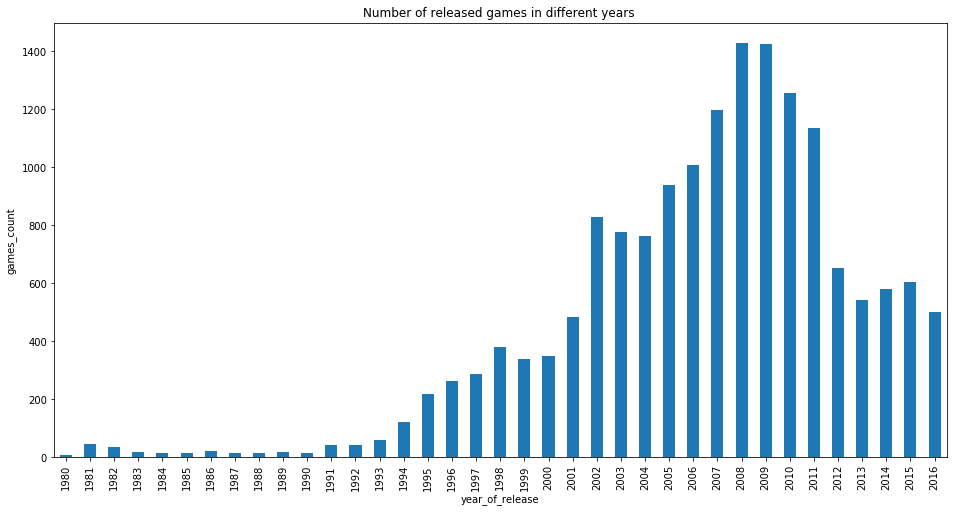

In [15]:
(games.groupby('year_of_release')['name'].count()).plot(kind = 'bar', figsize = (16,8))
plt.title('Number of released games in different years ', size = 12)
plt.xlabel('year_of_release')
plt.ylabel('games_count')
plt.show()

In 2006 - 2011 , every year games were released more than 1000.The maximum number of games were released in 2008 & 2009 which is almost same. Those data are most important for our analysis. 

**Variation of sales from platform to platform & choosing the platforms with the greatest total sales:**

In [16]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head()

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

The platform with the greatest total sales is "PS2".

**Visualizing the number of games released for each platform:**

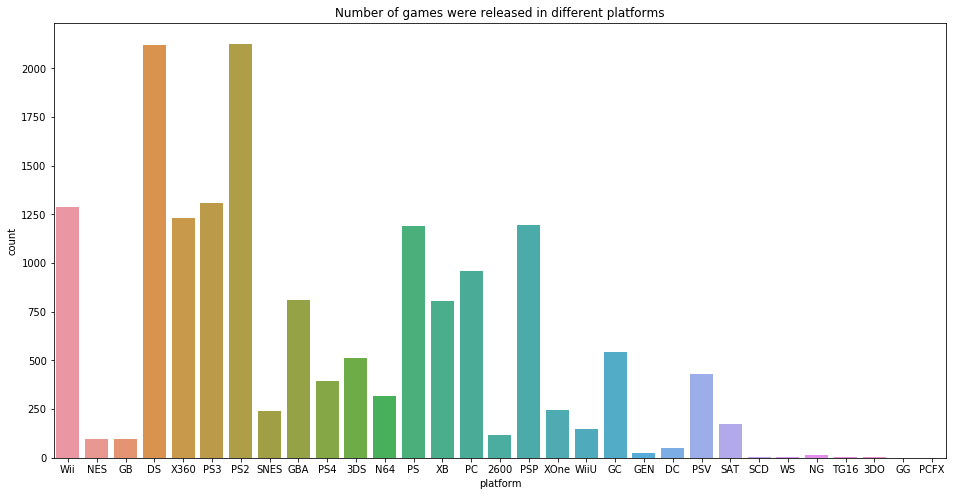

In [17]:
plt.figure(figsize = (16,8))
plt.title('Number of games were released in different platforms', fontsize = 12)
sns.countplot(x = 'platform', data = games)
plt.show()

The greatest number of games were released for the "DS" & "PS2" platform which is almost same. In "NES", "GB", "GEN", "DC" platforms released very less game.

**Visualizing the number of games released for each genre :**

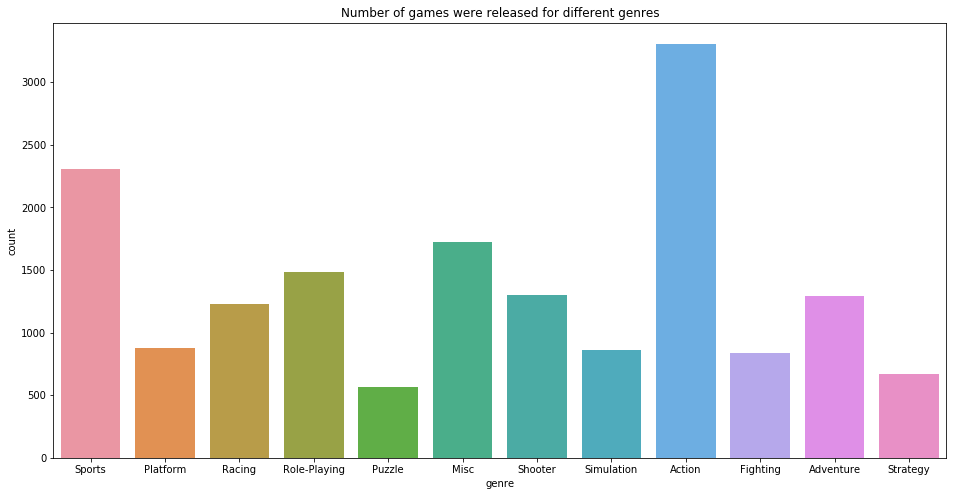

In [18]:
plt.figure(figsize = (16,8))
plt.title('Number of games were released for different genres', fontsize = 12)
sns.countplot(x = 'genre', data = games)
plt.show()

The most popular genres are "sports" and "Action". The less popular genre is "Puzzle".

**Total sales in different platform:**

In [19]:
platform_sales = games.groupby( 'platform')['total_sales'].sum().sort_values(ascending = False)
platform_sales.head()

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

Only "PS2" platform has sales more than 1000. Other platforms have sales less than 1000.

**Bar chart of total_sales in different platforms:**

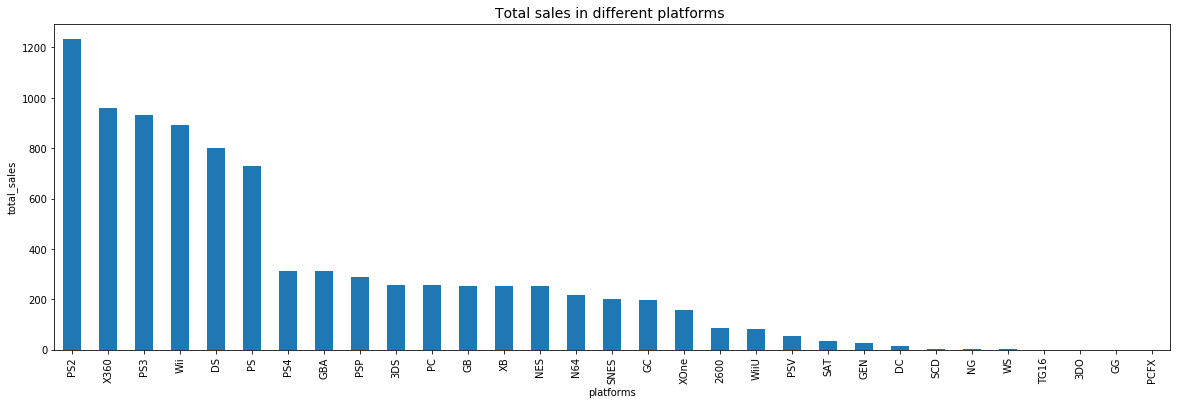

In [20]:
platform_sales.plot(x = "platform", y = "total_sales", kind = "bar", legend = False, figsize=(20,6))
plt.title('Total sales in different platforms ', size =14)
plt.xlabel('platforms')
plt.ylabel('total_sales')
plt.show()

From the above bar chart we can say that, TG16, 300, GG, PCFX platforms have no sales. On the other hand, SCD, NG, WS have also sales but that is very rare.

**visualizing points of total_sales in different platforms:**

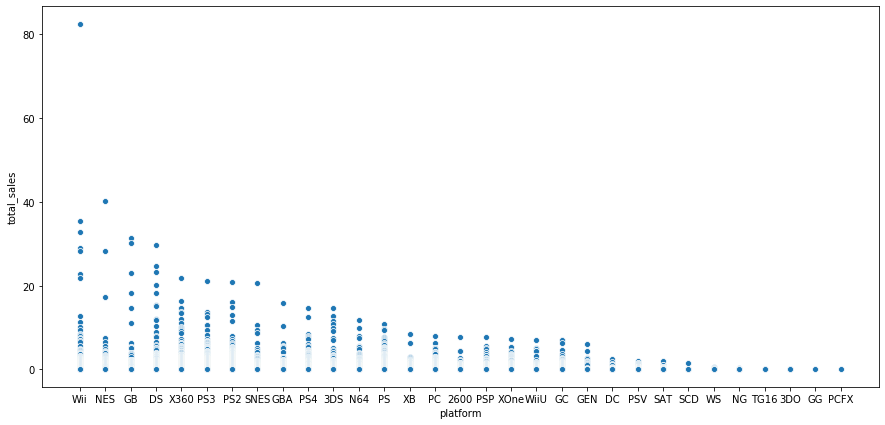

In [21]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = games, x = "platform", y = "total_sales")
plt.show()

**Total sales in different years :**

In [22]:
yearly_sales = games.groupby( 'year_of_release')['total_sales'].sum().sort_values(ascending = False)
yearly_sales.head()

year_of_release
2008    671.50
2009    658.82
2007    604.75
2010    590.13
2006    517.71
Name: total_sales, dtype: float64

**Bar chart of total sales in different years :**

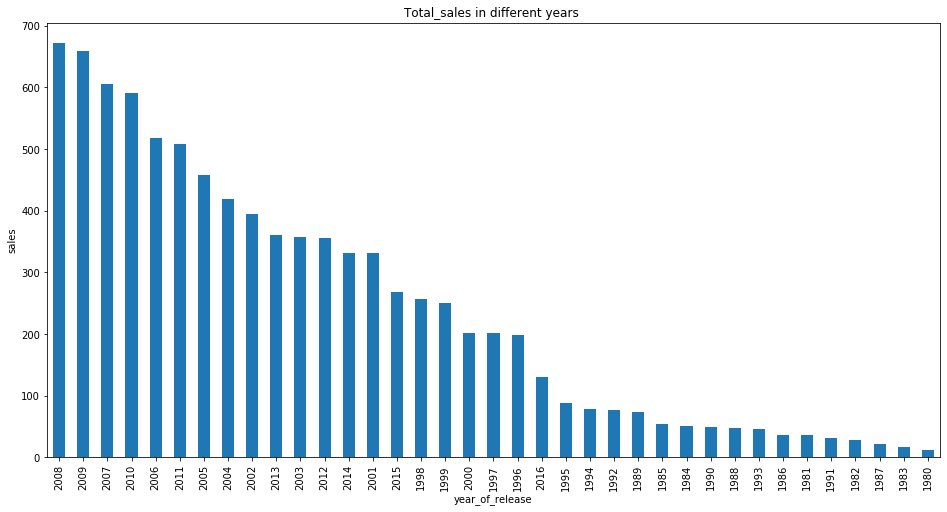

In [23]:
yearly_sales.plot(x = "platform", y = "total_sales", kind = "bar", legend = False, figsize = (16,8))
plt.title('Total_sales in different years ', size = 12)
plt.ylabel('sales')
plt.show()

From the bar chart we can conclude that from 1980 to 1995 total sales were less than 100.After that it's started incresing till 2008. The best total sales was in 2008 & which is 671.50. From 2010 it's started gradually decreasing.

**Boxplot of platform vs. total_sales for games data:**

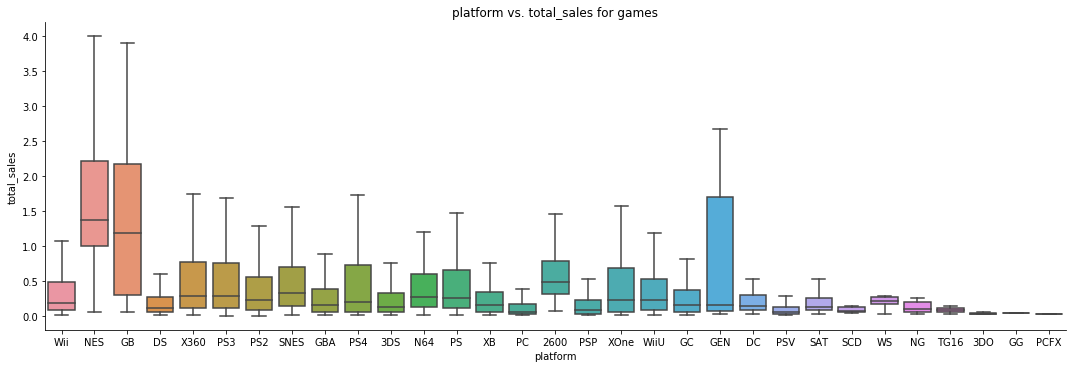

In [24]:
sns.catplot(x = "platform", y = "total_sales", kind = "box", height = 5, showfliers = False, aspect = 18/6, data = games).set(title = 'platform vs. total_sales for games')
plt.show()

**Distribution of the released games for each genre:**

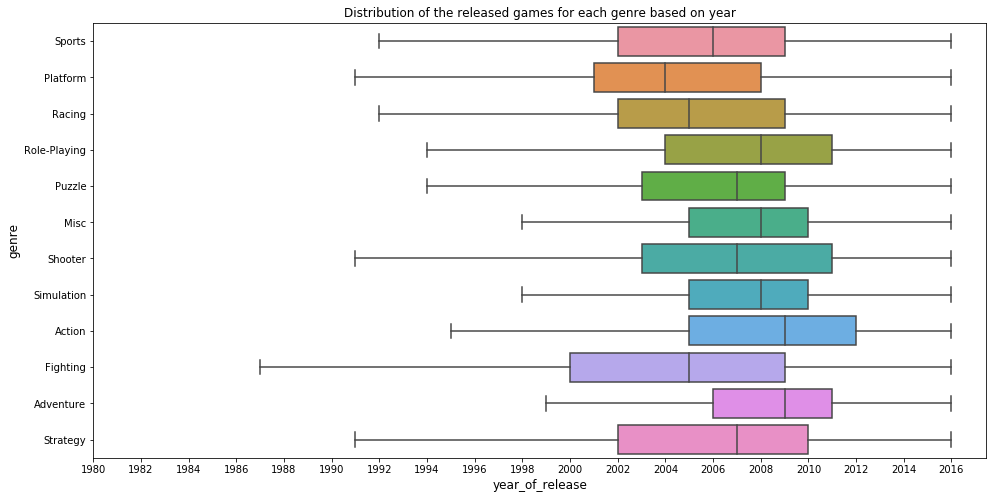

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data = games, x = 'year_of_release', y = 'genre', showfliers = False, ax = ax)
plt.xticks(np.arange(1980,2018,2))
plt.title('Distribution of the released games for each genre based on year', fontsize = 12)
plt.xlabel('year_of_release', fontsize = 12)
plt.ylabel('genre', fontsize = 12);

**Distribution of the released games for each platform:**

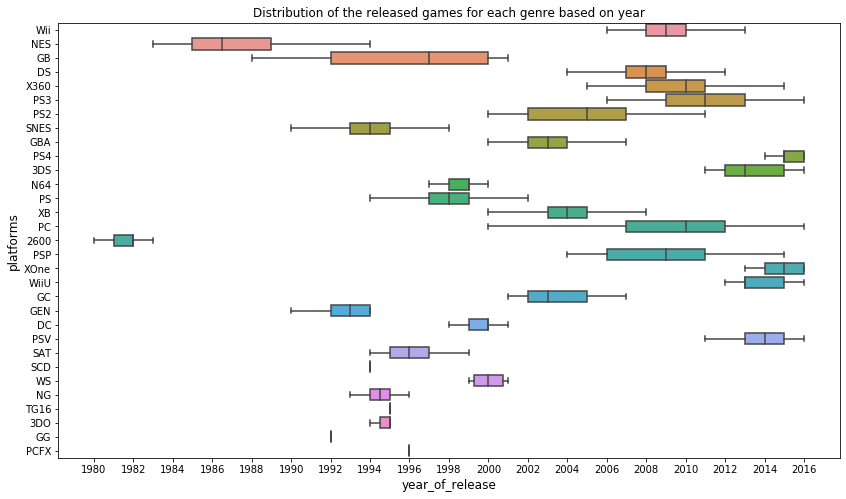

In [26]:
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(data = games, x = 'year_of_release', y = 'platform', showfliers = False, ax = ax)
plt.xticks(np.arange(1980,2018,2))
plt.title('Distribution of the released games for each genre based on year', fontsize = 12)
plt.xlabel('year_of_release', fontsize = 12)
plt.ylabel('platforms', fontsize = 12);

**Selecting games which was released from 2012:**

In [27]:
filtered_games = games.query('year_of_release >= 2012')
filtered_games = filtered_games.reset_index()
filtered_games.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,70.181144,7.041883,not_mentioned,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,72.652646,7.619515,not_mentioned,14.60
4,34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.000000,5.300000,M,13.79


**Determining the number of games released for each platform after filtering the data:**

PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: platform, dtype: int64


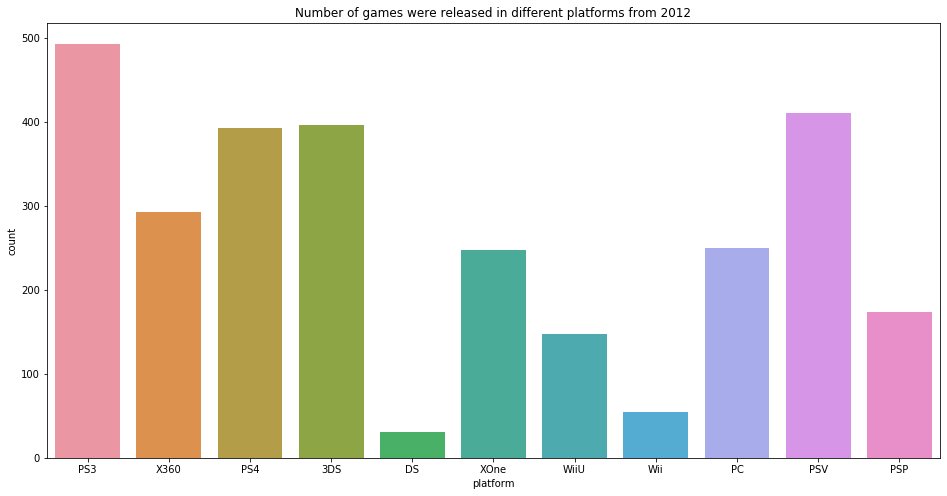

In [28]:
plt.figure(figsize = (16,8))
plt.title('Number of games were released in different platforms from 2012', fontsize = 12)
sns.countplot(x = 'platform',data = filtered_games)
print(filtered_games['platform'].value_counts())

The biggest games released for PS3 platform after filtering the data. PS4,3DS, PSV platform have released almost same number of games after filtering the data.

**Determining the number of games released for each genre after filtering the data:**

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64


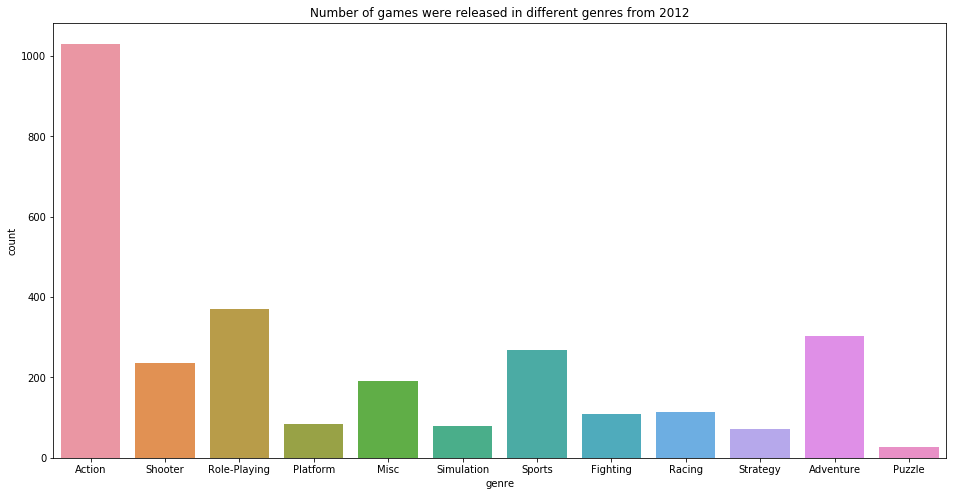

In [29]:
plt.figure(figsize = (16,8))
plt.title('Number of games were released in different genres from 2012', fontsize = 12)
sns.countplot(x = 'genre',data = filtered_games)
print(filtered_games['genre'].value_counts())

After filtering the games dataset, Action genre released the biggest number of games.

**Total_sales in different platforms after filtering the data:**

In [30]:
platform_sales_filtered = filtered_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales_filtered.head(20)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

After filtering data the PS4 platform has the biggest amount total sales.

**Bar chart of total_sales in different platforms after filtering the data:**

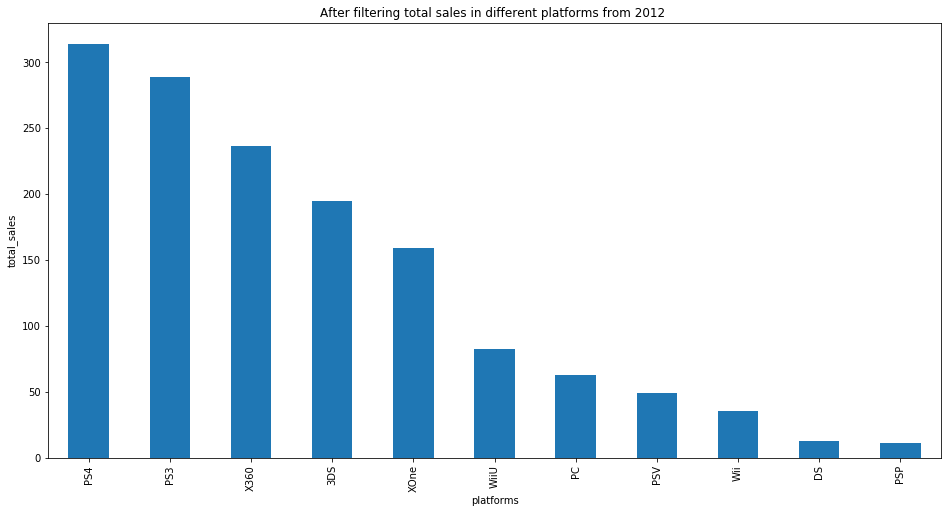

In [31]:
platform_sales_filtered.plot(x = "platform", y = "total_sales", kind = "bar", legend = False, figsize = (16,8))
plt.title('After filtering total sales in different platforms from 2012 ', size = 12)
plt.xlabel('platforms')
plt.ylabel('total_sales')
plt.show()

**Visualizing points of total_sales in different platforms after filtering the data:**

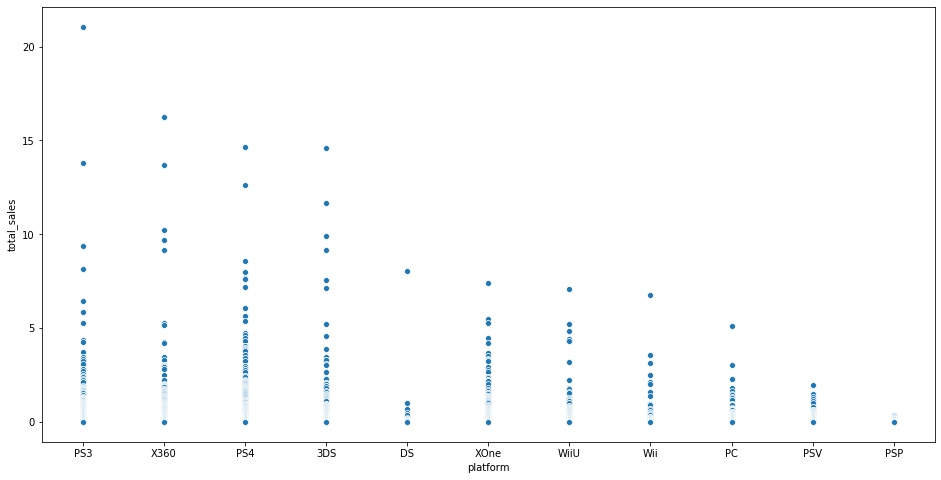

In [32]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = filtered_games, x = "platform", y = "total_sales")
plt.show()

**Boxplot of platform vs. total_sales for games for filtered data:**

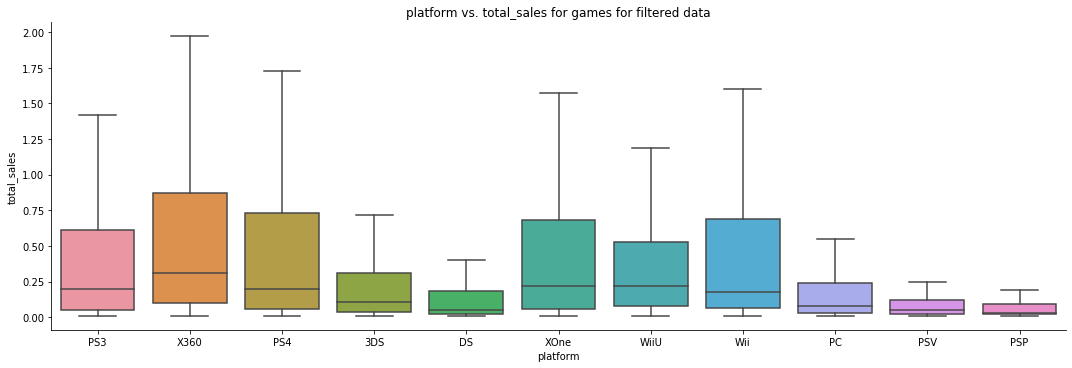

In [33]:
sns.catplot(x = "platform", y = "total_sales", kind = "box", height = 5, showfliers = False, aspect = 18/6, data = filtered_games).set(title = 'platform vs. total_sales for games for filtered data')
plt.show()

**Distribution of the released games for each genre after filtering the data:**

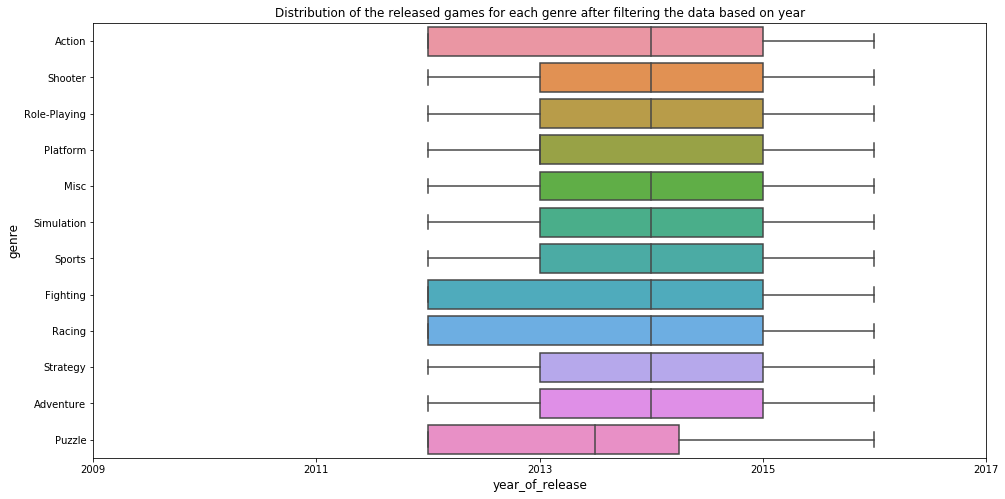

In [34]:
fig, ax = plt.subplots(figsize = (16,8))
sns.boxplot(data = filtered_games, x = 'year_of_release', y = 'genre', ax = ax)
plt.xticks(np.arange(2009,2018,2))
plt.title('Distribution of the released games for each genre after filtering the data based on year', fontsize = 12)
plt.xlabel('year_of_release', fontsize = 12)
plt.ylabel('genre', fontsize = 12);

After filtering the data we can conclude that Action, Fighting, Racing genres have the same distribution.

**Distribution of the released games for each platform after filtering the data:**

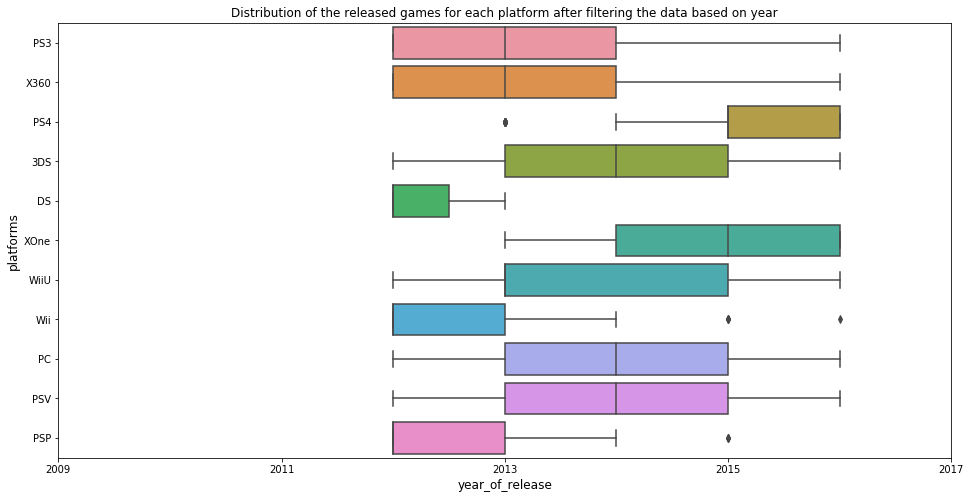

In [35]:
fig, ax = plt.subplots(figsize = (16, 8 ))
sns.boxplot(data = filtered_games, x ='year_of_release', y = 'platform', ax = ax)
plt.xticks(np.arange(2009,2018,2))
plt.title('Distribution of the released games for each platform after filtering the data based on year', fontsize = 12)
plt.xlabel('year_of_release', fontsize = 12)
plt.ylabel('platforms', fontsize = 12);

After filtering the data we can conclude that based on year PS3, X360 have the same distribution. On the other hand 3DS, PC, PSV have also same distribution based on year.

**How were the released games distributed per genre:**

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64


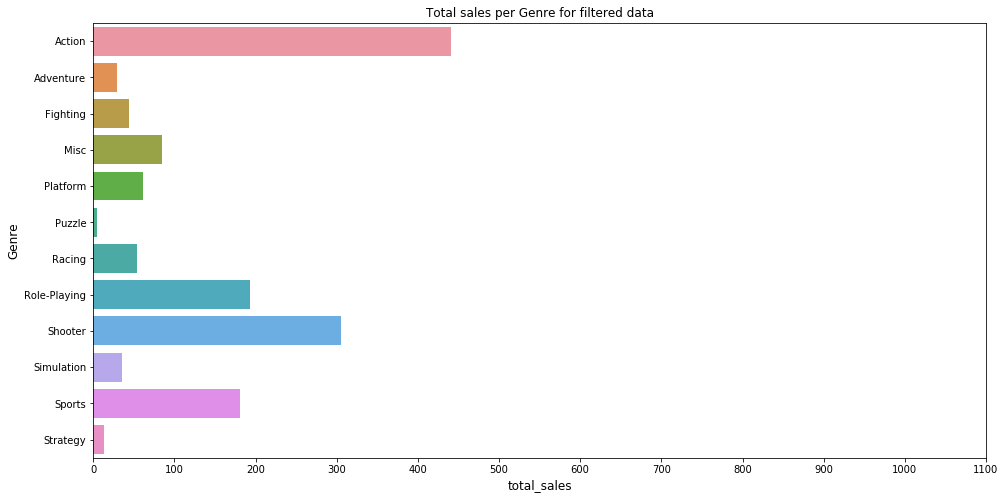

In [36]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(data = filtered_games.groupby('genre')['total_sales'].sum().reset_index(), x = 'total_sales', y = 'genre', ax = ax)
plt.xticks(np.arange(0,1200,100))
plt.title('Total sales per Genre for filtered data', fontsize = 12)
plt.xlabel('total_sales', fontsize = 12)
plt.ylabel('Genre', fontsize = 12);
print(filtered_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False))

**How were the released games distributed per genre for each region:**

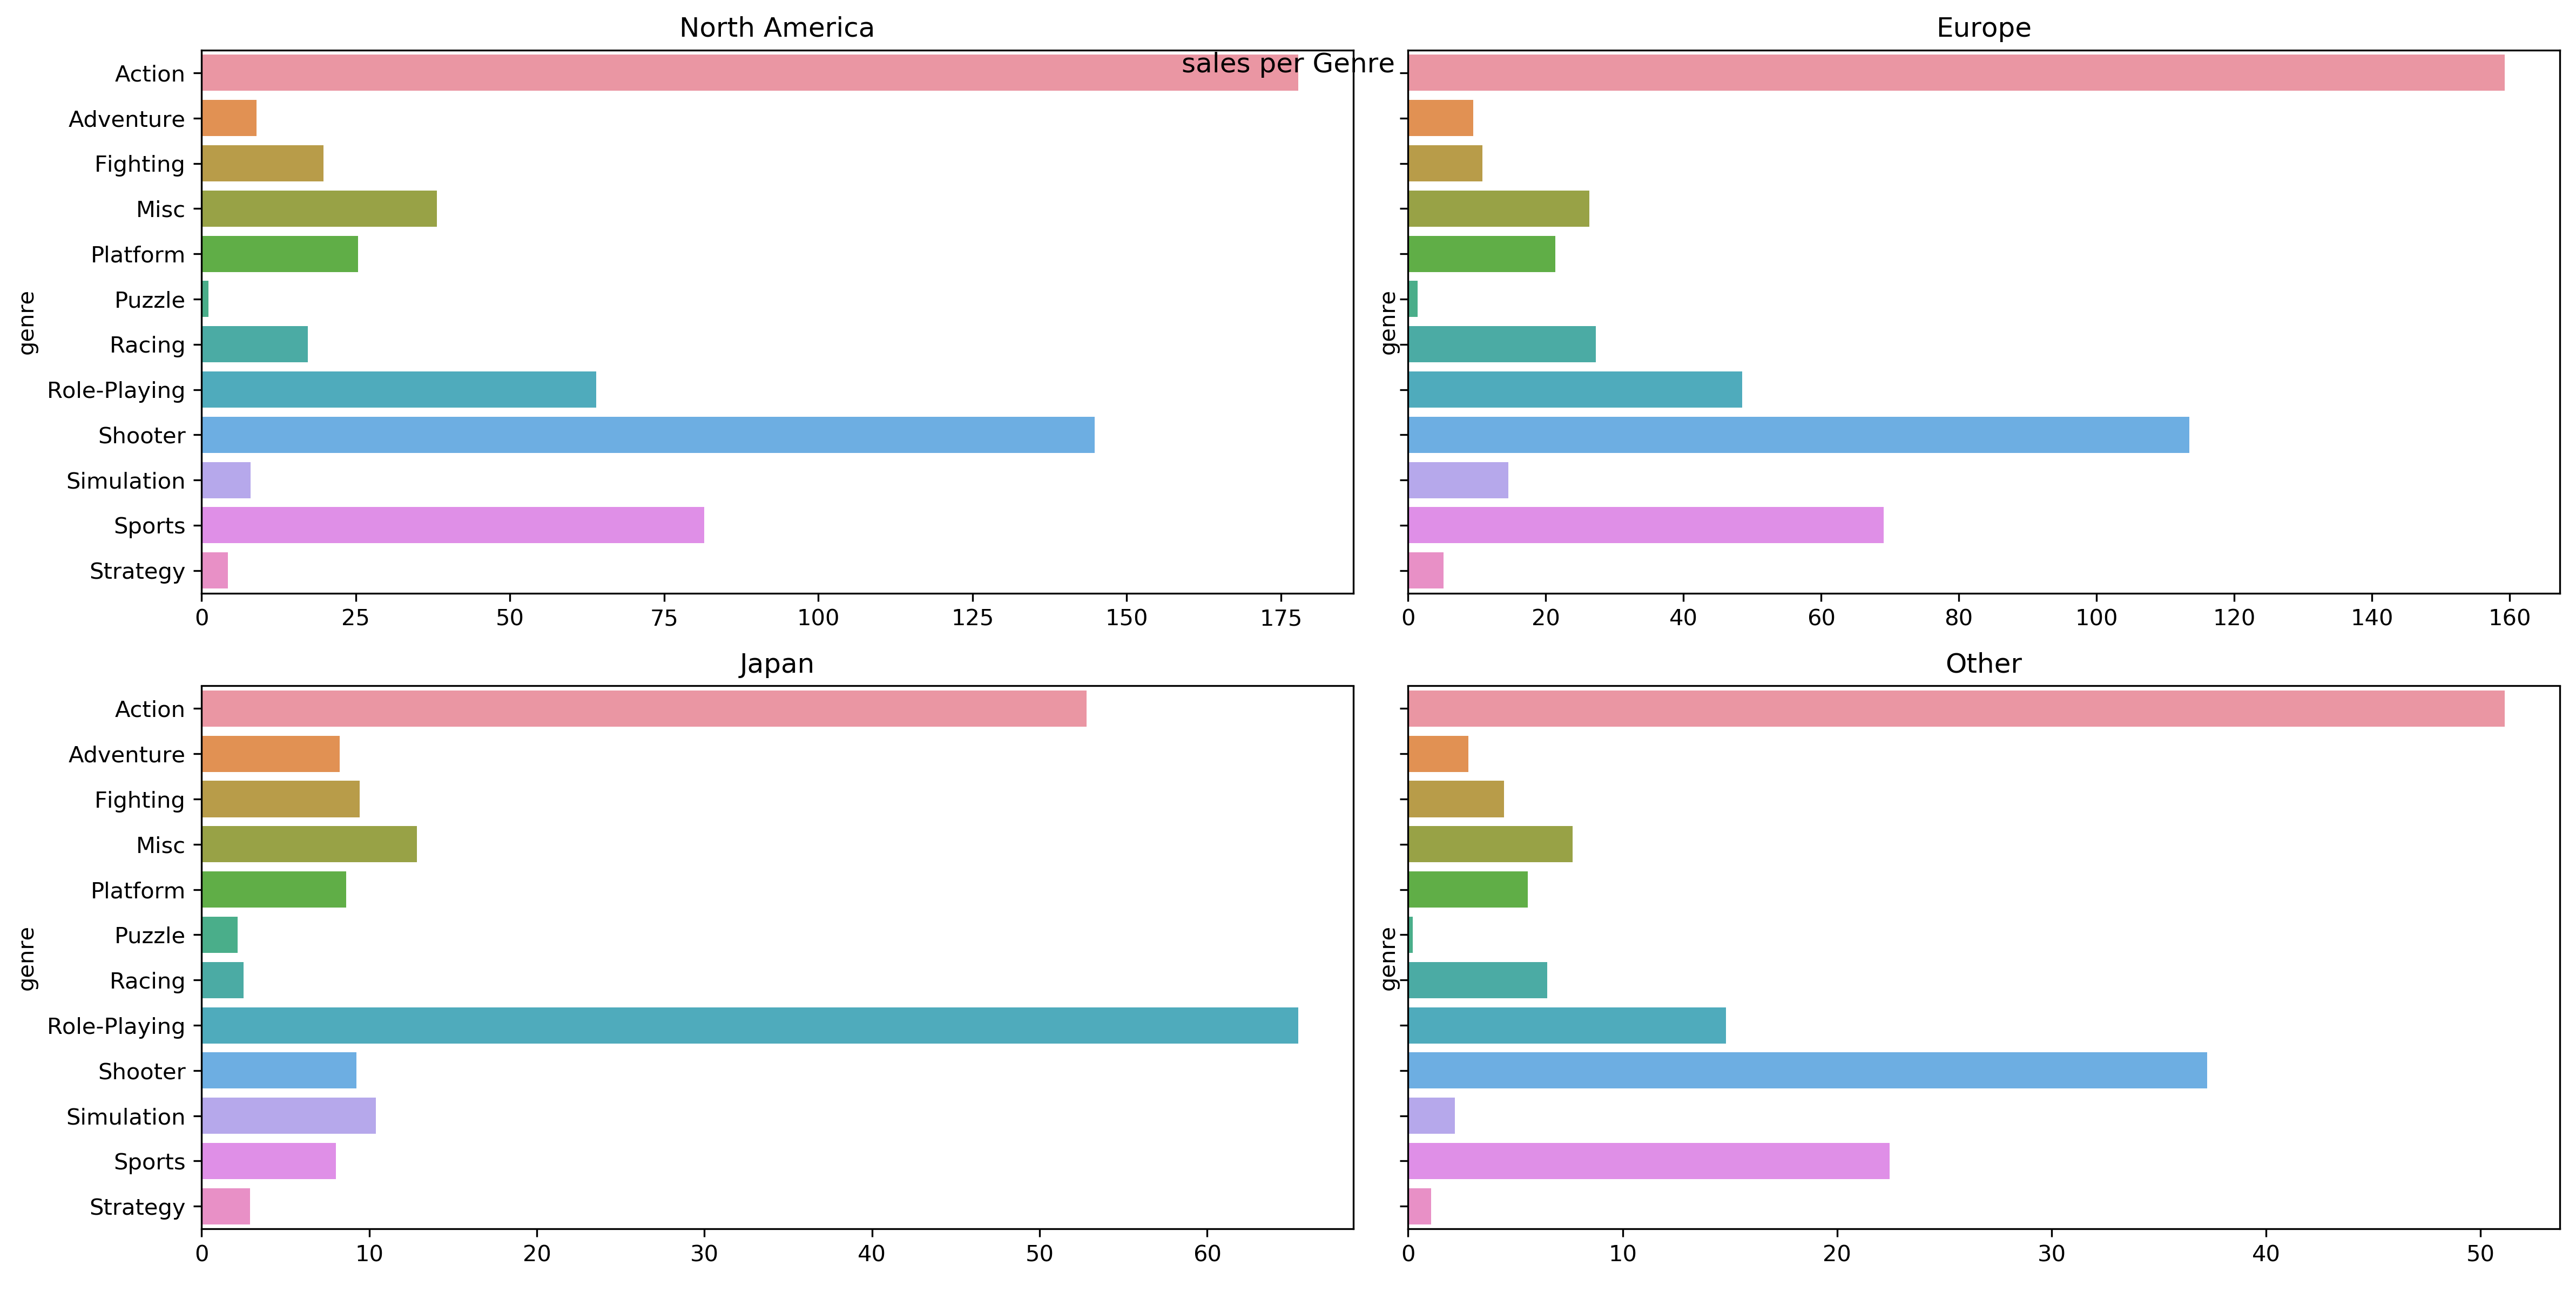

In [37]:
genreGroup = filtered_games.groupby('genre')

filtered_na_sales_by_genre = genreGroup['na_sales'].sum().reset_index()
filtered_eu_sales_by_genre = genreGroup['eu_sales'].sum().reset_index()
filtered_jp_sales_by_genre = genreGroup['jp_sales'].sum().reset_index()
filtered_other_sales_by_genre = genreGroup['other_sales'].sum().reset_index()

fig, axes = plt.subplots(2,2, figsize = (16,8), dpi = 300, sharey = True)
fig.suptitle('sales per Genre', fontsize = 12)

sns.barplot(ax=axes[0][0], data=filtered_na_sales_by_genre, y='genre', x='na_sales')
sns.barplot(ax=axes[0][1], data=filtered_eu_sales_by_genre, y='genre', x='eu_sales')
sns.barplot(ax=axes[1][0], data=filtered_jp_sales_by_genre, y='genre', x='jp_sales')
sns.barplot(ax=axes[1][1], data=filtered_other_sales_by_genre, y='genre', x='other_sales')
plt.tight_layout()


fontsize = 12
labels = [['North America', 'Europe'], ['Japan', 'Other']]

for x in range(2):
    for y in range(2):
        axes[x][y].set_title(labels[x][y], fontsize = fontsize)
        axes[x][y].set_xlabel('  ')

**Determining average sales platform:**

In [38]:
sales_platform1 = (filtered_games.groupby("platform")['total_sales'].sum())
print(sales_platform1)

avg_sales_platform2 = sales_platform1 /len(sales_platform1)
print(avg_sales_platform2)

platform
3DS     194.61
DS       12.55
PC       62.65
PS3     288.79
PS4     314.14
PSP      11.19
PSV      49.18
Wii      35.37
WiiU     82.19
X360    236.54
XOne    159.32
Name: total_sales, dtype: float64
platform
3DS     17.691818
DS       1.140909
PC       5.695455
PS3     26.253636
PS4     28.558182
PSP      1.017273
PSV      4.470909
Wii      3.215455
WiiU     7.471818
X360    21.503636
XOne    14.483636
Name: total_sales, dtype: float64


**Correlation matrix of sales vs scores:**

              critic_score  total_sales  user_score
critic_score      1.000000     0.300069    0.385499
total_sales       0.300069     1.000000   -0.031601
user_score        0.385499    -0.031601    1.000000


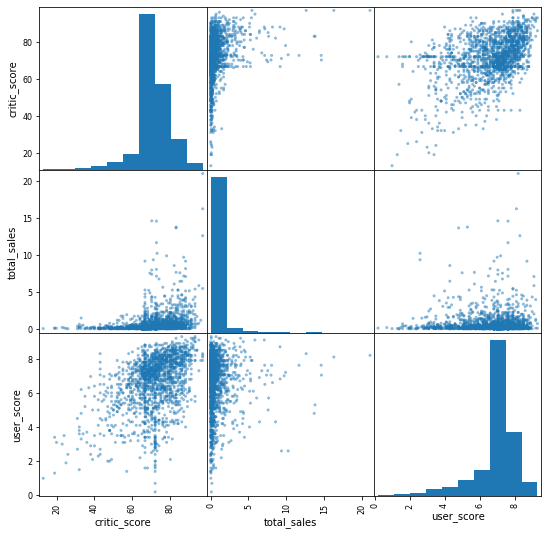

In [39]:
correlation_matrix = filtered_games.pivot_table(index = 'index', values = ['total_sales', 'critic_score', 'user_score'])
pd.plotting.scatter_matrix(correlation_matrix, figsize = (9,9))
print(correlation_matrix.corr())

From the correlation matrix of sales vs. scores we can conclude that crtitic_score & total_sales are positively correlated but user_score & total_sales are negatively correlated.

**Plotting filered_games dataset:**

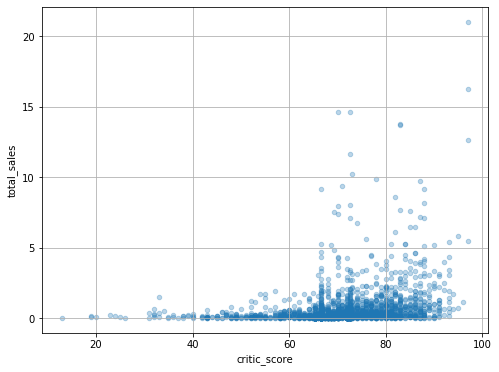

In [40]:
filtered_games.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter' , alpha = 0.3 ,  figsize = (8, 6),  grid = True) 
plt.show()

Conclusion:
-  In 2006 - 2011 , every year games were released more than 1000.The maximum number of games were released in 2008 & 2009 which is almost same. Those data are most important for our analysis.
-  The platform with the greatest total sales is "PS2".
-  The greatest number of games were released for the "DS" & "PS2" platform which is almost same. In "NES", "GB", "GEN", "DC" platforms released very less game.
-  The most popular genres are "sports" and "Action". The less popular genre is "Puzzle".
-  Only "PS2" platform has sales more than 1000. Other platforms have sales less than 1000.
-  From 1980 to 1995 total sales were less than 100.After that it's started incresing till 2008. The best total sales was in 2008 & which is 671.50. From 2010 it's started gradually decreasing.

After filtering the data we can conclude that 
-  Action, Fighting, Racing genres have the same distribution.
-  Action genre released the biggest number of games.
-  Based on year PS3, X360 have the same distribution. On the other hand 3DS, PC, PSV have also same distribution based on year.
    

**Choosing platform "PS4" for checking user and professional reviews affect sales:**

In [41]:
correlation_matrix = filtered_games.query('platform== "PS4"').pivot_table(index = 'index', values = ['total_sales', 'critic_score', 'user_score'])
print(correlation_matrix.corr())

              critic_score  total_sales  user_score
critic_score      1.000000     0.354517    0.503579
total_sales       0.354517     1.000000   -0.050876
user_score        0.503579    -0.050876    1.000000


From the above result for choosing PS4 platform we can see that
-  critic_score & total_sales are positively correlated (If one values increases together with the other, the Pearson correlation coefficient is positive.)because an increase in one generally means an increase in the other.
-  user_score & total_sales are negatively correlate(If one decreases when the other increases, the coefficient is negative.).

**Choosing platform "WiiU" for checking user and professional reviews affect sales:**

In [42]:
correlation_matrix = filtered_games.query('platform== "WiiU"').pivot_table(index = 'index', values = ['total_sales', 'critic_score', 'user_score'])
print(correlation_matrix.corr())

              critic_score  total_sales  user_score
critic_score      1.000000     0.335784    0.690035
total_sales       0.335784     1.000000    0.354370
user_score        0.690035     0.354370    1.000000


From the above result for choosing WiiU platform we can see that
-  critic_score & total_sales are positively correlated because an increase in one generally means an increase in the other.
-  user_score & total_sales are also positively correlated because an increase in one generally means an increase in the other.

<a id='the_destination4'></a>
# Step 4. Create a user profile for each region

**Top five platforms depending on the na_sales:**

In [43]:
filtered_games.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head()

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

The top five platforms are depending on the na_sales region are X360, PS4, PS3, XOne & 3DS respectively .

**Top five platforms depending on the eu_sales:**

In [44]:
filtered_games.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

The top five platforms are depending on the eu_sales region are PS4, PS3, X360, XOne, 3DS respectively.

**Top five platforms depending on the jp_sales:**

In [45]:
filtered_games.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head()

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

The top five platforms are depending on the jp_sales region are 3DS, PS3, PSV, PS4, WiiU respectively.

**Top five genres depending on the na_sales:**

In [46]:
filtered_games.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head()

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

The top five genres are depending on the na_sales region are Action, Shooter, Sports, Role_Playing, Misc respectively.

**Top five genres depending on the eu_sales:**

In [47]:
filtered_games.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head()

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

The top five genres are depending on the eu_sales region are Action, Shooter, Sports, Role_Playing, Racing respectively.

**Top five genres depending on the jp_sales:**

In [48]:
filtered_games.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head()

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

The top five genres are depending on the jp_sales region are Role_Playing, Action, Misc, Simulation, Fighting respectively.

**Top five rating depending on the na_sales:**

In [49]:
filtered_games.groupby('rating')['na_sales'].sum().sort_values(ascending = False).head()

rating
M                231.57
E                114.37
not_mentioned    103.31
E10+              75.70
T                 66.02
Name: na_sales, dtype: float64

The top five rating are in the na_sales region are M, E, not_mentioned, E10+, T respectively.

**Top five rating depending on the eu_sales:**

In [50]:
filtered_games.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).head()

rating
M                193.96
E                113.03
not_mentioned     91.50
E10+              55.37
T                 52.96
Name: eu_sales, dtype: float64

The top five rating are depending on the eu_sales region are M, E, not_mentioned, E10+, T respectively.

**Top five rating depending on the jp_sales:**

In [51]:
filtered_games.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).head()

rating
not_mentioned    108.84
E                 28.33
T                 26.02
M                 21.20
E10+               8.19
Name: jp_sales, dtype: float64

The top five rating are depending on the jp_sales region  are not_mentioned, E, T, M, E10+ respectively.

**Rating depending on the total_sales:**

In [52]:
filtered_games.groupby('rating')['total_sales'].sum().sort_values(ascending = False).head()

rating
M                510.11
not_mentioned    330.82
E                287.17
T                162.94
E10+             155.49
Name: total_sales, dtype: float64

The top five rating are depending on the total_sales region are M, not_mentioned, E, T, E10+ respectively.

**Genre depending on the total_sales:**

In [53]:
filtered_games.groupby('genre')['total_sales'].sum().sort_values(ascending = False).head()

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Name: total_sales, dtype: float64

Top five genres depending on the total_sales are Action, Shooter, Role-Playing, Sports, Misc respectively.

**Platforms depending on the total_sales:**

In [54]:
filtered_games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head()

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
Name: total_sales, dtype: float64

The top five platforms are depending on the total_sales are PS4, PS3, X360, 3DS, XOne respectively. 

Finally we can conclude that
-  The top five platforms are depending on the na_sales region are X360, PS4, PS3, XOne & 3DS respectively.
-  The top five platforms are dependong on the eu_sales region are PS4, PS3, X360, XOne, 3DS respectively.
-  The top five platforms are depending on the jp_sales region are 3DS, PS3, PSV, PS4, WiiU respectively.
-  The top five genres are depending on the na_sales region are Action, Shooter, Sports, Role_Playing, Misc respectively.
-  The top five genres are depending on the eu_sales region are Action, Shooter, Sports, Role_Playing, Racing respectively.
-  The top five genres are depending on the jp_sales region are Role_Playing, Action, Misc, Simulation, Fighting respectively.
-  The top five rating are depending on the na_sales region are M, E, not_mentioned, E10+, T respectively.
-  The top five rating are depending on the eu_sales region are M, E, not_mentioned, E10+, T respectively.
-  The top five rating are depending on the jp_sales region are not_mentioned, E, T, M, E10+ respectively.
-  The top five rating are depending in the total_sales are M, not_mentioned, E, T, E10+ respectively.
-  The top five platforms are depending on the total_sales are PS4, PS3, X360, 3DS, XOne respectively.
-  The top five genres are depending on the total_sales are Action, Shooter, Role-Playing, Sports, Misc respectively.

<a id='the_destination5'></a>
# Step 5. Testing hypotheses

**First hypothsis formulation:**

- Null Hypothesis (H_0) : Average user ratings of the Xbox One and PC platforms are the same.


- Alternative hypothesis (H_1) : Average user ratings of the Xbox One and PC platforms are not the same.

In [55]:
variance_01 = np.var(filtered_games.query('platform == "XOne"')['user_score'])
variance_02 = np.var(filtered_games.query('platform == "PC"')['user_score'])
 
if variance_01 == variance_02:
    print('both variance are equal')
elif variance_01 != variance_02:
    print('variance are not equal. So the parameter : equal_var = False ')
else:
    print("can not be compared")

variance are not equal. So the parameter : equal_var = False 


**Applying critical statistical significance level and getting decision regarding null hypothesis:**

In [56]:
alpha = 0.05 
results = st.ttest_ind(filtered_games.query('platform == "XOne"')['user_score'],filtered_games.query('platform == "PC"')['user_score'] , equal_var = False )
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.3358176607162223
We can't reject the null hypothesis


As we are not rejecting the null hypothesis that means the average user ratings of the Xbox One and PC platforms are the same.

**Finding mean for the "XB" and "PC" platforms users for "user_score":**

In [57]:
print("Average user ratings for the XB platform :", filtered_games.query('platform == "XOne"')['user_score'].mean())
print()
print("Average user ratings for the PC platform :" , filtered_games.query('platform == "PC"')['user_score'].mean())

Average user ratings for the XB platform : 6.670133442559927

Average user ratings for the PC platform : 6.5505886460480385


Average user ratings for the XB & PC platforms are almost same.That means this follow the null hypothesis.

**Second hypothsis formulation:**

- Null Hypothesis (H_0) : Average user ratings for the Action and Sports genres are different.


- Alternative hypothesis (H_1) : Average user ratings for the Action and Sports genres are not different.

**Comparison of variance for the "Action" genres and "Sports" genres:**

In [58]:
variance_03 = np.var(filtered_games.query('genre == "Action"')['user_score'])
variance_04 = np.var(filtered_games.query('genre == "Sports"')['user_score'])

if variance_03 == variance_04:
    print('both variance are equal')
elif variance_03 != variance_04:
    print('variance are not equal. So the parameter : equal_var = False ')
else:
    print("can not be compared")

variance are not equal. So the parameter : equal_var = False 


**Applying critical statistical significance level and getting decision regarding null hypothesis:**

In [59]:
alpha = 0.05
results = st.ttest_ind(filtered_games.query('genre == "Action"')['user_score'], filtered_games.query('genre == "Sports"')['user_score'] , equal_var = False)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.0822046507404263e-21
We reject the null hypothesis


As we are rejecting null hypotheses that means that the average user ratings for the Action and Sports genres are not different.

Final result regarding hypotheses:
-  Average user ratings of the Xbox One and PC platforms are the same.
-  Average user ratings for the Action and Sports genres are not different.

<a id='the_destination6'></a>
# Step 6. Overall conclusion

After filtering the data we can conclude that

-  Action, Fighting, Racing genres have the same distribution.
-  Action genre released the biggest number of games.
-  Based on year PS3, X360 have the same distribution. On the other hand 3DS, PC, PSV have also same distribution based on year.
-  The top five rating are depending in the total_sales region are M, not_mentioned, E, T, E10+ respectively.
-  The top five platforms are depending on the total_sales are PS4, PS3, X360, 3DS, XOne respectively.
-  The top five genres are depending on the total_sales are Action, Shooter, Role-Playing, Sports, Misc respectively.

Final result regarding hypotheses:

-  Average user ratings of the Xbox One and PC platforms are the same.
-  Average user ratings for the Action and Sports genres are not different.

- From our analysis, year can be considered as the boundary of our dataset. When a game releases we see that at the beginning sales are very less but after some 3-4 years it's going to peak & then drop. So we can say the average lifespan of the platform is about 10 years. Our final dataset is 2016 so we can subtract 3-4 years from 2017 & finally we can consider our boundary.
